<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [8]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows (optional)
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print('-----------------------------------------------------------------------------------')

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Verify that duplicates are removed
print(f"\nNumber of rows after removing duplicates: {len(df_no_duplicates)}")
print('-----------------------------------------------------------------------------------')
print("\nFirst few rows after removing duplicates:")
print(df_no_duplicates.head())


Number of duplicate rows: 0
-----------------------------------------------------------------------------------

Number of rows after removing duplicates: 65437
-----------------------------------------------------------------------------------

First few rows after removing duplicates:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                          

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [11]:
# Find missing values for all columns
missing_values = df["CodingActivities"].isnull().sum()

# Display columns with their respective count of missing values
print(f"Missing values for 'CodingActivities' column is: {missing_values}")

Missing values for 'CodingActivities' column is: 10971


##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [13]:
# Impute missing values in the 'CodingActivities' column using forward-fill
df["CodingActivities"] = df["CodingActivities"].ffill()

# Verify that missing values are imputed
missing_after_imputation = df["CodingActivities"].isnull().sum()
print(f"Number of missing values in 'CodingActivities' after forward-fill: {missing_after_imputation}")

Number of missing values in 'CodingActivities' after forward-fill: 0


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [14]:
# Check for columns that likely represent compensation
compensation_columns = [col for col in df.columns if 'comp' in col.lower()]

# Display the identified compensation-related columns
print("Compensation-related columns:")
print(compensation_columns)

Compensation-related columns:
['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [24]:
#!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Check if 'ConvertedCompYearly' exists in the dataset
if 'ConvertedCompYearly' in df.columns: 
    ## I tried the forward fill and the results for both columns were NaN values
    # Drop rows with missing values in the 'ConvertedCompYearly' column, to avoid getting NaN results
    df = df.dropna(subset=['ConvertedCompYearly'])
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Use .loc[] to modify the column directly
    df.loc[:, 'ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

    # Display the first few rows to verify normalization
    print("Normalized 'ConvertedCompYearly' column (Min-Max Scaling):")
    print(df[['ConvertedCompYearly', 'ConvertedCompYearly_MinMax']].head())
else:
    print("'ConvertedCompYearly' column is not found in the dataset.")


Normalized 'ConvertedCompYearly' column (Min-Max Scaling):
    ConvertedCompYearly  ConvertedCompYearly_MinMax
72               7322.0                     0.00045
73               7322.0                     0.00045
74               7322.0                     0.00045
75               7322.0                     0.00045
76               7322.0                     0.00045


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [25]:
# Since forward fill gave us NaN values, we'll drop the NaN values: which was already done in the previous cell
# Calculate the mean and standard deviation of the 'ConvertedCompYearly' column
mean = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()

# Calculate Z-scores and create a new column 'ConvertedCompYearly_Zscore'
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean) / std_dev

# Display the first few rows to verify the result
print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Zscore']].head())


    ConvertedCompYearly  ConvertedCompYearly_Zscore
72               7322.0                   -0.897824
73               7322.0                   -0.897824
74               7322.0                   -0.897824
75               7322.0                   -0.897824
76               7322.0                   -0.897824


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


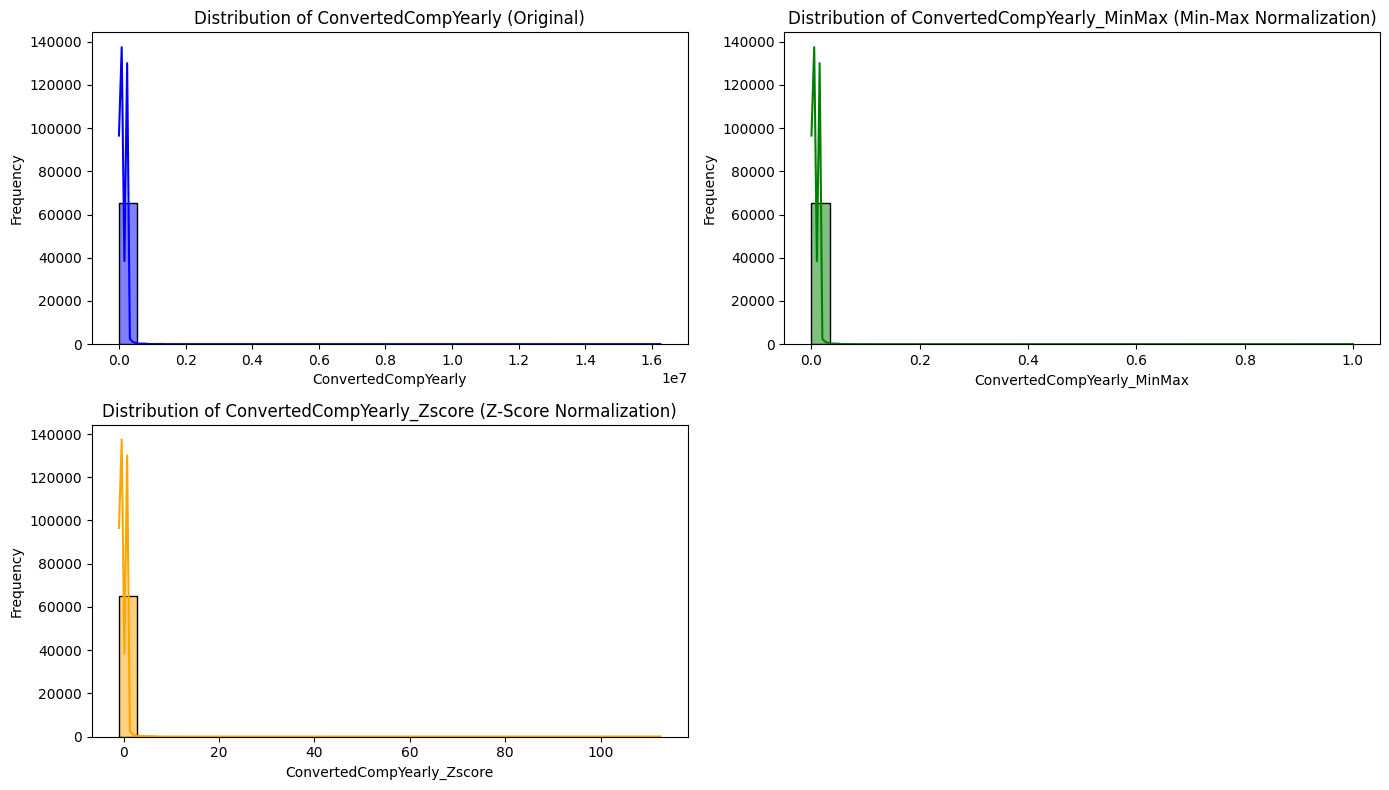

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values by forward-filling the 'ConvertedCompYearly' column
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].ffill()

# Normalize using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Calculate Z-scores
mean = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean) / std_dev

# Set up the plotting layout
plt.figure(figsize=(14, 8))

# Plot the histogram for 'ConvertedCompYearly' (Original)
plt.subplot(2, 2, 1)
sns.histplot(df['ConvertedCompYearly'], kde=True, color='blue', bins=30)
plt.title('Distribution of ConvertedCompYearly (Original)')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')

# Plot the histogram for 'ConvertedCompYearly_MinMax' (Normalized with Min-Max Scaling)
plt.subplot(2, 2, 2)
sns.histplot(df['ConvertedCompYearly_MinMax'], kde=True, color='green', bins=30)
plt.title('Distribution of ConvertedCompYearly_MinMax (Min-Max Normalization)')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')

# Plot the histogram for 'ConvertedCompYearly_Zscore' (Normalized with Z-Score)
plt.subplot(2, 2, 3)
sns.histplot(df['ConvertedCompYearly_Zscore'], kde=True, color='orange', bins=30)
plt.title('Distribution of ConvertedCompYearly_Zscore (Z-Score Normalization)')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
